In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re


In [6]:
url="https://www.hubertiming.com/results/2018MLK"  #open link
html=urlopen(url)
soup=BeautifulSoup(html)

In [9]:
title=soup.title
print(title.text)
print(title)

Race results for the 2018 MLK Dream Run!
<title>Race results for the 2018 MLK Dream Run!</title>


In [11]:
#to get links in the page
links=soup.find_all('a',href=True)
for link in links:
    print(link['href'])


https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2018MLK10K#individual
/results/2018MLK15K#individual
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [110]:
data=[]
allrows=soup.find_all("tr") #all tags starting at <tr>
for row in allrows:
    row_list=row.find_all("td")#just the data
    dataRow=[]
    for cell in row_list:
        dataRow.append(cell.text.lstrip().rstrip())       
    data.append(dataRow)
data=data[5:]

data
    





    

[['1',
  '1191',
  'MAX RANDOLPH',
  'M',
  '29',
  'WASHINGTON',
  'DC',
  '16:48',
  '5:25',
  '1 of 78',
  'M 21-39',
  '1 of 33',
  '0:08',
  '16:56'],
 ['2',
  '1080',
  'NEED NAME KAISER RUNNER',
  'M',
  '25',
  'PORTLAND',
  'OR',
  '17:31',
  '5:39',
  '2 of 78',
  'M 21-39',
  '2 of 33',
  '0:09',
  '17:40'],
 ['3',
  '1275',
  'DAN FRANEK',
  'M',
  '52',
  'PORTLAND',
  'OR',
  '18:15',
  '5:53',
  '3 of 78',
  'M 40-54',
  '1 of 27',
  '0:07',
  '18:22'],
 ['4',
  '1223',
  'PAUL TAYLOR',
  'M',
  '54',
  'PORTLAND',
  'OR',
  '18:31',
  '5:58',
  '4 of 78',
  'M 40-54',
  '2 of 27',
  '0:07',
  '18:38'],
 ['5',
  '1245',
  'THEO KINMAN',
  'M',
  '22',
  '',
  '',
  '19:31',
  '6:17',
  '5 of 78',
  'M 21-39',
  '3 of 33',
  '0:09',
  '19:40'],
 ['6',
  '1185',
  'MELISSA GIRGIS',
  'F',
  '27',
  'PORTLAND',
  'OR',
  '19:39',
  '6:20',
  '1 of 113',
  'F 21-39',
  '1 of 53',
  '0:07',
  '19:46'],
 ['7',
  '1251',
  'CHARLIE COGGESHALL',
  'M',
  '39',
  'PORTLAND',
  'O

[['1', '1191', 'MAX RANDOLPH', 'M', '29', 'WASHINGTON', 'DC', '16:48', '5:25', '1 of 78', 'M 21-39', '1 of 33', '0:08', '16:56'], ['2', '1080', 'NEED NAME KAISER RUNNER', 'M', '25', 'PORTLAND', 'OR', '17:31', '5:39', '2 of 78', 'M 21-39', '2 of 33', '0:09', '17:40'], ['3', '1275', 'DAN FRANEK', 'M', '52', 'PORTLAND', 'OR', '18:15', '5:53', '3 of 78', 'M 40-54', '1 of 27', '0:07', '18:22'], ['4', '1223', 'PAUL TAYLOR', 'M', '54', 'PORTLAND', 'OR', '18:31', '5:58', '4 of 78', 'M 40-54', '2 of 27', '0:07', '18:38'], ['5', '1245', 'THEO KINMAN', 'M', '22', '', '', '19:31', '6:17', '5 of 78', 'M 21-39', '3 of 33', '0:09', '19:40'], ['6', '1185', 'MELISSA GIRGIS', 'F', '27', 'PORTLAND', 'OR', '19:39', '6:20', '1 of 113', 'F 21-39', '1 of 53', '0:07', '19:46'], ['7', '1251', 'CHARLIE COGGESHALL', 'M', '39', 'PORTLAND', 'OR', '19:51', '6:24', '6 of 78', 'M 21-39', '4 of 33', '0:10', '20:01'], ['8', '1154', 'UNKNOWN RUNNER SEE TIMER', 'M', '', '', '', '24:58', '8:03', '7 of 78', '', '1 of 9', '

In [61]:
df=pd.DataFrame(data)
#print(df)
print(df.head())
print(df.tail())

  0     1                        2  3   4           5   6      7     8   \
0  1  1191             MAX RANDOLPH  M  29  WASHINGTON  DC  16:48  5:25   
1  2  1080  NEED NAME KAISER RUNNER  M  25    PORTLAND  OR  17:31  5:39   
2  3  1275               DAN FRANEK  M  52    PORTLAND  OR  18:15  5:53   
3  4  1223              PAUL TAYLOR  M  54    PORTLAND  OR  18:31  5:58   
4  5  1245              THEO KINMAN  M  22                  19:31  6:17   

        9        10       11    12     13  
0  1 of 78  M 21-39  1 of 33  0:08  16:56  
1  2 of 78  M 21-39  2 of 33  0:09  17:40  
2  3 of 78  M 40-54  1 of 27  0:07  18:22  
3  4 of 78  M 40-54  2 of 27  0:07  18:38  
4  5 of 78  M 21-39  3 of 33  0:09  19:40  
      0     1                 2  3   4         5   6        7      8   \
186  187  1254    CYNTHIA HARRIS  F  64  PORTLAND  OR  1:07:51  21:53   
187  188  1085    EBONY LAWRENCE  F  30  PORTLAND  OR  1:08:12  22:00   
188  189  1170  ANTHONY WILLIAMS  M  39  PORTLAND  OR  1:09:11  22

In [63]:
# bring in colums
head_list=[]
col_headers=soup.find_all('th')
for col in col_headers:
    head_list.append(col.text)
print(head_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [90]:
df.columns=head_list
df.head(100)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1189,SHAYLA TURNER,F,33,PORTLAND,OR,39:30,12:44,42 of 113,F 21-39,25 of 53,0:18,39:48
96,97,1177,MELITA LYNCH,F,22,PORTLAND,OR,39:55,12:52,43 of 113,F 21-39,26 of 53,0:23,40:18
97,98,1178,DEVON WONG,M,26,PORTLAND,OR,39:55,12:52,55 of 78,M 21-39,25 of 33,0:23,40:18
98,99,1184,KELLY BUCHANAN,F,28,PORTLAND,OR,40:03,12:55,44 of 113,F 21-39,27 of 53,0:36,40:39


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Time        191 non-null    object
 8   Chip Pace        191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.0+ KB


In [68]:
df.shape

(191, 14)

In [101]:
df2=df.dropna(axis=0,how='any') #axis=0 checking row 
df2.shape #no null values

(191, 14)

In [102]:
df2

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,187,1254,CYNTHIA HARRIS,F,64,PORTLAND,OR,1:07:51,21:53,110 of 113,F 55+,14 of 14,1:19,1:09:10
187,188,1085,EBONY LAWRENCE,F,30,PORTLAND,OR,1:08:12,22:00,111 of 113,F 21-39,53 of 53,0:58,1:09:10
188,189,1170,ANTHONY WILLIAMS,M,39,PORTLAND,OR,1:09:11,22:19,78 of 78,M 21-39,33 of 33,0:08,1:09:19
189,190,2087,LEESHA POSEY,F,43,PORTLAND,OR,1:33:53,30:17,112 of 113,F 40-54,36 of 37,0:00,1:33:53


In [115]:
df2.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,16:48,5:25,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER,M,25,PORTLAND,OR,17:31,5:39,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,18:15,5:53,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,18:31,5:58,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,19:31,6:17,5 of 78,M 21-39,3 of 33,0:09,19:40


<BarContainer object of 191 artists>

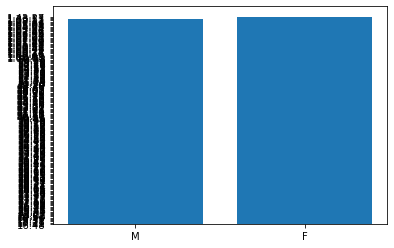

In [116]:
plt.bar(df2['Gender'],df2['Chip Time'])